In [ ]:
import pandas as pd


In [21]:
# Import the dataset from csv file.
iris = pd.read_csv('iris.csv', delimiter = ',')

In [15]:
# Number of instances and how many attributes in the dataset.
iris.shape

(150, 5)

In [17]:
# Datatypes in the dataset
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [37]:
# Sample look at the dataset
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
28,5.2,3.4,1.4,0.2,setosa
77,6.7,3.0,5.0,1.7,versicolor
109,7.2,3.6,6.1,2.5,virginica
6,4.6,3.4,1.4,0.3,setosa
137,6.4,3.1,5.5,1.8,virginica
53,5.5,2.3,4.0,1.3,versicolor
52,6.9,3.1,4.9,1.5,versicolor
57,4.9,2.4,3.3,1.0,versicolor
65,6.7,3.1,4.4,1.4,versicolor
48,5.3,3.7,1.5,0.2,setosa


In [18]:
# Number of instances of each species.
iris.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [16]:
sp_mean = iris.groupby('species').mean()
to_mean = iris.mean()
means = sp_mean.append(to_mean, ignore_index=True)
means.insert(0, 'species', ['setosa', 'versicolor', 'virginica', 'all_species'])
means

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.006000,3.418,1.464000,0.244000
1,versicolor,5.936000,2.770,4.260000,1.326000
2,virginica,6.588000,2.974,5.552000,2.026000
3,all_species,5.843333,3.054,3.758667,1.198667


In [17]:
sp_std = iris.groupby('species').std()
to_std = iris.std()
std = sp_std.append(to_std, ignore_index=True)
std.insert(0, 'species', ['setosa', 'versicolor', 'virginica', 'all_species'])
std

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,0.352490,0.381024,0.173511,0.107210
1,versicolor,0.516171,0.313798,0.469911,0.197753
2,virginica,0.635880,0.322497,0.551895,0.274650
3,all_species,0.828066,0.433594,1.764420,0.763161


In [14]:
iris.shape

(150, 5)

In [3]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [22]:
import matplotlib.pyplot as plt

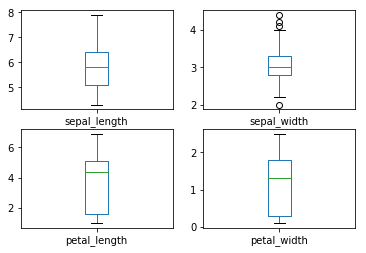

In [23]:
# Boxplot
iris.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

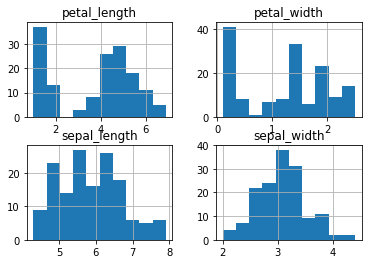

In [24]:
iris.hist()
plt.show()

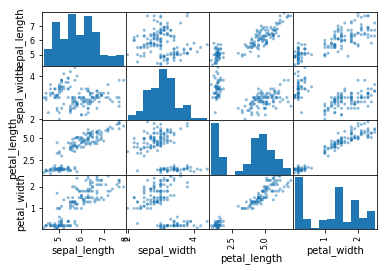

In [26]:
pd.plotting.scatter_matrix(iris)
plt.show()

In [28]:
import seaborn as sns

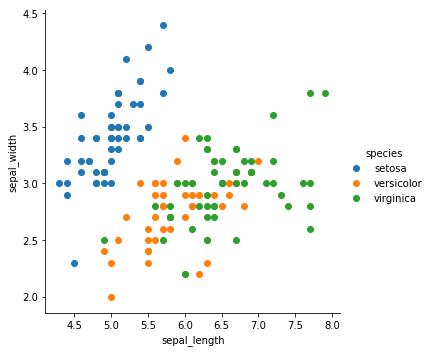

In [30]:
sns.FacetGrid(iris, hue = 'species', height=5).map(plt.scatter, 'sepal_length', 'sepal_width').add_legend()
plt.show()

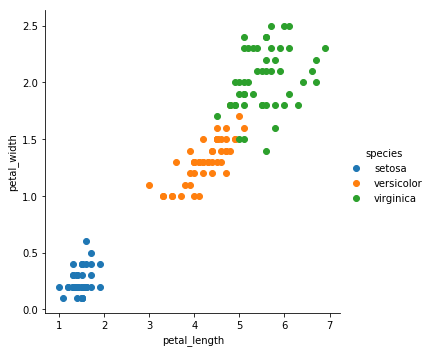

In [31]:
sns.FacetGrid(iris, hue = 'species', height=5).map(plt.scatter, 'petal_length', 'petal_width').add_legend()
plt.show()

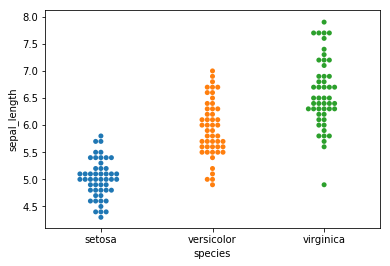

In [32]:
sns.swarmplot(x = 'species', y = 'sepal_length', data = iris)
plt.show()

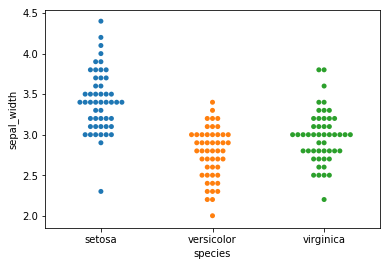

In [33]:
sns.swarmplot(x = 'species', y = 'sepal_width', data = iris)
plt.show()

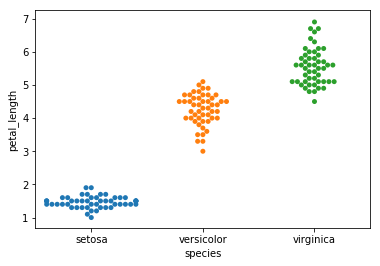

In [34]:
sns.swarmplot(x = 'species', y = 'petal_length', data = iris)
plt.show()

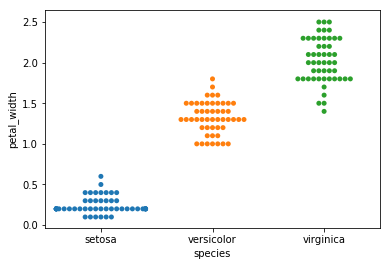

In [35]:
sns.swarmplot(x = 'species', y = 'petal_width', data = iris)
plt.show()

### Splitting the Dataset 
Below the dataset is split to explore each species individually.

In [5]:
setosa = iris.loc[0:49]
versicolor = iris.loc[50:99]
virginica = iris.loc[100:149]

### Setosa

In [6]:
setosa = iris.loc[0:49]
setosa.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [13]:
setosa.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.746780,0.263874,0.279092
sepal_width,0.746780,1.000000,0.176695,0.279973
petal_length,0.263874,0.176695,1.000000,0.306308
petal_width,0.279092,0.279973,0.306308,1.000000


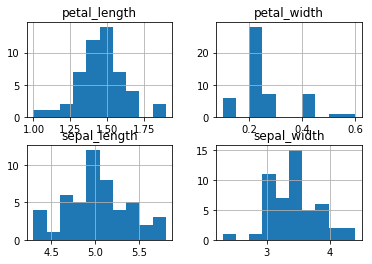

In [25]:
setosa.hist()
plt.show()

### Versicolor

In [9]:
versicolor = iris.loc[50:99]
versicolor.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


### Virginica

In [10]:
virginica = iris.loc[100:149]
virginica.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000
